<img 
     src="https://github.com/Kesterchia/Institute-of-Data/raw/master/Mini%20Project%201%20(EDA)/Global%20animal%20diseases%20dataset/Data/kruger_wildlife__banner.jpg" 
     alt="Drawing" 
     style="width: 600px;"/>

## About the dataset:

## Context
### This dataset is downloaded from the EMPRES Global Animal Disease Information System.
### The Empress-i system is run by the Food and Agriculture Organisation of the United Nations. Its Disease Outbreak Module provides updated information on global animal disease distribution and current threats at national, regional and global level on priority animal diseases. Disease data, such as information on suspicions and confirmation of outbreaks in livestock and wildlife species, laboratory results or follow-up reports on an outbreak situation, can be stored in a standardized format and are presented through a user-friendly and customizable interface. 

## Content
### The dataset shows the when, where and what of animal disease outbreaks from 2016 to 2017, including African swine fever, Foot and mouth disease and Bird-flu. Numbers of cases, deaths, etc are also included.




# Part 1: Question


### ???

# Part 2: Getting a brief overview of the data

In [136]:
# Import modules 
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline

In [3]:
#Read in animal shelter data on cat adoptions as df
df = pd.read_csv(r'D:\Google Drive\STUDY MAN\Institute of Data\Mini Project 1 (EDA)\Global animal diseases dataset\Data\Outbreak_240817.csv')

In [4]:
# Quickly seeing some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17008 entries, 0 to 17007
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  17008 non-null  int64  
 1   source              17008 non-null  object 
 2   latitude            17008 non-null  float64
 3   longitude           17008 non-null  float64
 4   region              17008 non-null  object 
 5   country             17008 non-null  object 
 6   admin1              17008 non-null  object 
 7   localityName        17008 non-null  object 
 8   localityQuality     17008 non-null  object 
 9   observationDate     16506 non-null  object 
 10  reportingDate       17008 non-null  object 
 11  status              17008 non-null  object 
 12  disease             17008 non-null  object 
 13  serotypes           10067 non-null  object 
 14  speciesDescription  15360 non-null  object 
 15  sumAtRisk           9757 non-null   float64
 16  sumC

In [5]:
#Generating profile report for df
pandas_profiling.ProfileReport(df)

# Observations:

### Human-related variables like deaths, age and affected individuals have over 90% of values missing. This could be due to difficulty getting information on whether diseases have affected the human population

### The data seems clean in other columns with geographical data and disease types.





# Part 3: Doing some EDA to find information from the dataset

## Looking at the most common diseases:

In [123]:
#Find top 5 most common diseases
top5_diseases = df[['disease']].groupby(df['disease']).count().nlargest(7,'disease')
top5_diseases

disease
disease                        
Influenza - Avian          6479
Bluetongue                 3391
African swine fever        3330
Lumpy skin disease         2112
MERS-CoV                    675
Foot and mouth disease      303
Newcastle disease           185

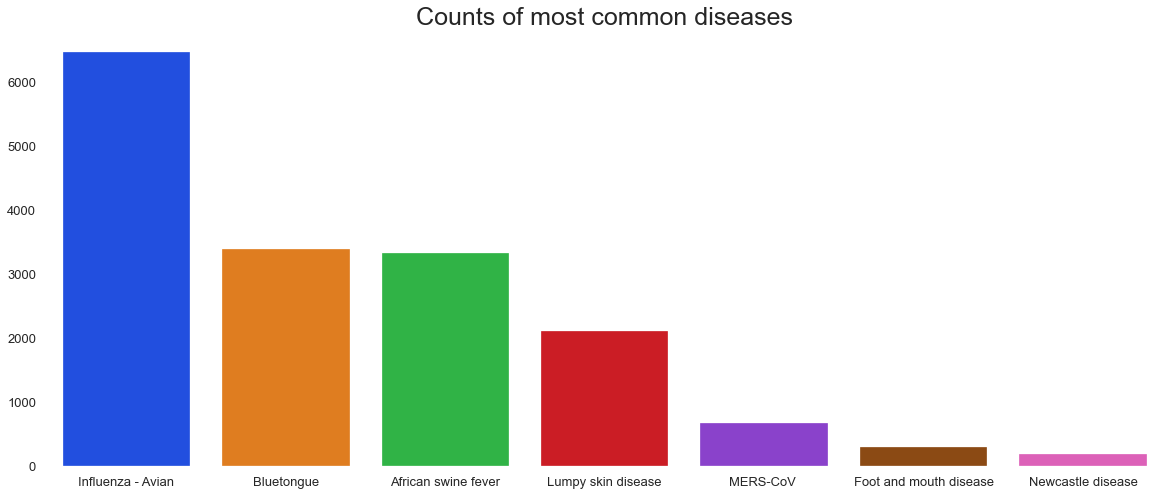

In [261]:
#Plot the counts of diseases
fig = plt.figure(figsize = (20,8))

disease_plot = sns.countplot(df[df['disease'].isin(list(top5_diseases.index))]['disease'],
                             palette = 'bright',
                             order = top5_diseases.index)
disease_plot.tick_params(labelsize=13)

plt.title('Counts of most common diseases',fontdict = {'fontsize':25})
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Observation: The 4 most common diseases seem much more prevalent than the others.

## Looking at which species are most affected by diseases worldwide:

In [202]:
# Looking for most common species affected by diseases
np.count_nonzero(df['speciesDescription'].unique())
top8_species = df['speciesDescription'].groupby(df['speciesDescription']).count().nlargest(8)
top8_species

speciesDescription
domestic, cattle                 4913
wild, wild boar                  2670
domestic, chicken                1682
domestic, duck                   1227
domestic, unspecified bird        808
domestic, sheep                   684
domestic, swine                   675
wild,mute swan (cygnus olor))     311
Name: speciesDescription, dtype: int64

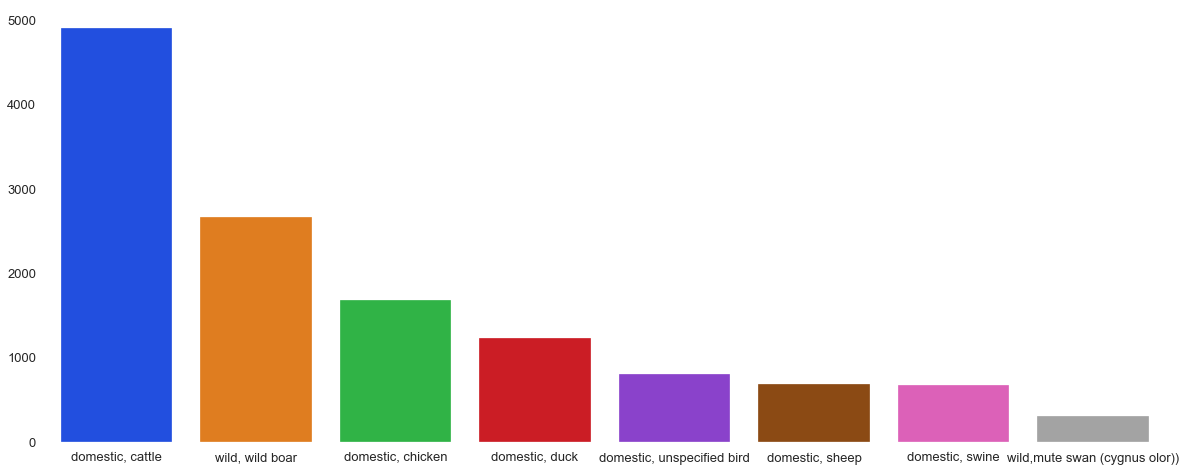

In [209]:
#Plot these species
fig = plt.figure(figsize = (20,8))
species_plot = sns.countplot(df[df['speciesDescription'].isin(top8_species.index)]['speciesDescription'],
                             order = top8_species.index,
                             palette = 'bright')
species_plot.tick_params(labelsize = 13)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

## Looking at the age distribution of humans affected by zoonotic diseases:

In [264]:
#Get values on age of humans affected by disease
age_info = df[df['humansAge'].notnull()][['humansAge']]

#Dropping values of age = 0
age_info_clean = age_info[age_info['humansAge'] != 0]

age_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 83 to 16881
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   humansAge  362 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


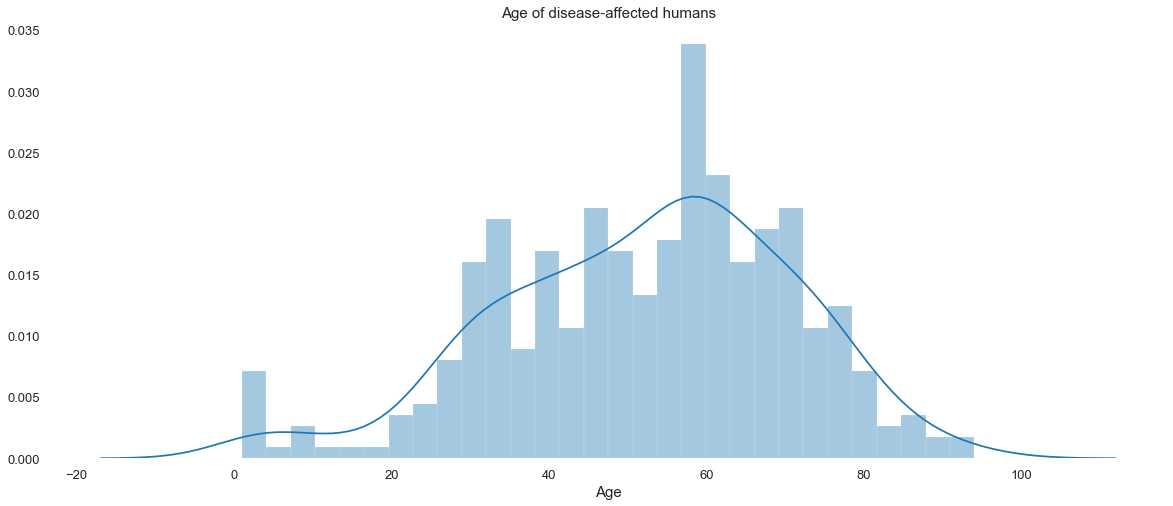

In [268]:
fig = plt.figure(figsize = (20,8))
age_plot = sns.distplot(age_info_clean, bins = 30)
age_plot.tick_params(labelsize = 13)

plt.xlabel('Age', fontdict = {'fontsize':15})
plt.title('Age of disease-affected humans', fontdict = {'fontsize':15})
plt.show()

## Observation: The age distribution seems relatively normal with the mean age at around 60. There is also a slight spike in cases in infants at the left end of the graph.

## It seems like the elderly and the very young are more susceptible to zoonotic diseases. Maybe because older farmers are less educated about proper hygienic practices? 